In [ ]:
!python -m spacy download en_core_web_sm

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import spacy
import nltk
import en_core_web_sm

In [ ]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/combined_tweets_data.csv")

In [ ]:
data.head()

,tweet_content,labels_zero_shot,respective_scores,best_labels_scores,best_labels,sentiments_one_shot_classifier_score,sentiments_one_shot_classifier,sentiment_via_VADER
0,pathetic still think take piss counselling,"['sad', 'anger', 'panic', 'brave', 'happy']","[0.9776253700256348, 0.010648265480995178, 0.0...",0.977625,sad,0.998147,negative,negative
1,view forget selfcare sunrise metier counsellin...,"['happy', 'brave', 'panic', 'anger', 'sad']","[0.971422553062439, 0.020104505121707916, 0.00...",0.971423,happy,0.995800,positive,negative
2,work hard achieve goal reward favourite posses...,"['happy', 'brave', 'panic', 'sad', 'anger']","[0.41082775592803955, 0.31598541140556335, 0.1...",0.410828,happy,0.936278,positive,positive
3,thing grateful count live unit able work home ...,"['happy', 'brave', 'panic', 'sad', 'anger']","[0.581499457359314, 0.3123384118080139, 0.0440...",0.581499,happy,0.962516,positive,positive
4,thing grateful tough year relationship work ho...,"['brave', 'sad', 'panic', 'happy', 'anger']","[0.4356525242328644, 0.2900204360485077, 0.145...",0.435653,brave,0.551461,positive,positive


In [ ]:
data = data[['tweet_content',"sentiments_one_shot_classifier"]]

In [ ]:
data.head()

,tweet_content,sentiments_one_shot_classifier
0,pathetic still think take piss counselling,negative
1,view forget selfcare sunrise metier counsellin...,positive
2,work hard achieve goal reward favourite posses...,positive
3,thing grateful count live unit able work home ...,positive
4,thing grateful tough year relationship work ho...,positive


In [ ]:
lecd = LabelEncoder()

In [ ]:
#Label Encoding the data
data['sentiments_one_shot_classifier'] = lecd.fit_transform(data['sentiments_one_shot_classifier'])

In [ ]:
data.head()

,tweet_content,sentiments_one_shot_classifier
0,pathetic still think take piss counselling,0
1,view forget selfcare sunrise metier counsellin...,1
2,work hard achieve goal reward favourite posses...,1
3,thing grateful count live unit able work home ...,1
4,thing grateful tough year relationship work ho...,1


In [ ]:
data.shape

(231023, 2)

In [ ]:
data.isnull().sum()

tweet_content                     5139
sentiments_one_shot_classifier       0
dtype: int64

In [ ]:
#Removing NAN values
data.dropna(how='any', inplace=True)

In [ ]:
data.shape

(225884, 2)

In [ ]:
x = data['tweet_content']
y = data['sentiments_one_shot_classifier']

In [ ]:
#Training and validation data sets
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [ ]:
#Series to list to apply tokenizers
x_train, x_test = x_train.to_list(), x_test.to_list()

In [ ]:
def preprocessing(sentences):
  tokens = []
  tokens = [token.text for token in nlp(sentences) if not token.is_stop]
  tokens = ' '.join(tokens)
  return tokens

In [ ]:
%%time
x_train = list(map(preprocessing, x_train))

CPU times: user 19min 4s, sys: 3.16 s, total: 19min 7s
Wall time: 19min 4s


In [ ]:
%%time
x_test = list(map(preprocessing,x_test))

CPU times: user 4min 39s, sys: 758 ms, total: 4min 39s
Wall time: 4min 39s


In [ ]:
# #Tokenizing the data
# vocab_size = 100000
# embedded_dim = 16
# trunc_type = 'post'
# oov_tok = '<UKN>'
# max_length = 40

# #Tokenizing training set
# tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)
# tokenizer.fit_on_texts(x_train)
# word_index = tokenizer.word_index
# #print(word_index)
# sequences = tokenizer.texts_to_sequences(x_train)
# train_padded = pad_sequences(sequences, truncating=trunc_type, maxlen=max_length)

# #Tokenizng validation test
# testing_sequences = tokenizer.texts_to_sequences(x_test)
# test_padded = pad_sequences(testing_sequences, truncating=trunc_type, maxlen = max_length)

**DNN Network**

In [ ]:
# model = keras.Sequential()
# model.add(keras.layers.Embedding(vocab_size,embedded_dim, input_length = max_length ))
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(6, activation = 'relu'))
# model.add(keras.layers.Dropout(0.2))
# model.add(keras.layers.Dense(1, activation = 'sigmoid'))


# model.summary()
# model.compile(loss = 'binary_crossentropy', optimizer = keras.optimizers.Adam(), metrics = ['acc'])
# model_fit = model.fit(train_padded,y_train, epochs = 10, validation_data = (test_padded, y_test))
# pd.DataFrame(model_fit.history).plot(figsize=(8,8))
# plt.grid(True)

###RNN_Network class for many classificatiobs

In [ ]:
#class to run many objects
class RNN_Network:
  def __init__(self, train_text,test_text,train_labels,test_labels):
    self.train_text = train_text
    self.test_text = test_text
    self.train_labels = train_labels
    self.test_labels = test_labels


    #tokenizing
    self.__vocab_size = 50000
    self.__embedded_dim = 16
    trunc_type = 'post'
    oov_tok = '<UKN>'
    self.__max_length = 50

    #tokenizing the training set
    tokenizer = Tokenizer(num_words=self.__vocab_size,oov_token=oov_tok)
    tokenizer.fit_on_texts(self.train_text)
    sequences = tokenizer.texts_to_sequences(self.train_text)
    self.train_padded = pad_sequences(sequences, truncating=trunc_type, maxlen=self.__max_length)

    #toknizing the testing set
    testing_sequence = tokenizer.texts_to_sequences(self.test_text)
    self.test_padded = pad_sequences(testing_sequence, truncating = trunc_type, maxlen = self.__max_length)

  def Model_compiling_and_fitting(self, 
                                  epochs,
                                  loss_fun = 'binary_crossentropy',
                                  optimizer = keras.optimizers.Adam(), 
                                  Dropout = False ,
                                  DNN = False,
                                  Global_Average_Pooling = False, 
                                  Single_Layer_LSTM = False,
                                  Multi_Layer_LSTM = False,
                                  Single_GRU = False,
                                  Multi_Layer_GRU = False,
                                  save_model = False):
    """
    Different RNN networks can be run through the method.
    ---- To run other models, make the boolean expression True only for one network
        (DNN, Gloabl_Ayerage_pooling, single_layer_lstm,multi_layer_lstm,single_gru,multi_layer_gru)
    ---- epochs, loss function can be selected as the preference
    """
    #DNN Network(Done)
    if DNN:
      if Dropout:
        model = keras.Sequential()
        model.add(keras.layers.Embedding(self.__vocab_size,self.__embedded_dim, input_length = self.__max_length ))
        model.add(keras.layers.Flatten())
        model.add(keras.layers.Dense(32, activation = 'relu'))
        model.add(keras.layers.Dropout(0.2))
        model.add(keras.layers.Dense(1, activation = 'sigmoid'))
      else:
        model = keras.Sequential()
        model.add(keras.layers.Embedding(self.__vocab_size,self.__embedded_dim, input_length = self.__max_length ))
        model.add(keras.layers.Flatten())
        model.add(keras.layers.Dense(32, activation = 'relu'))
        model.add(keras.layers.Dense(32, activation='relu'))
        model.add(keras.layers.Dense(1, activation = 'sigmoid'))
    

    #Gloabl Average Pooling(Test)
    if Global_Average_Pooling:
      if Dropout:
        model = keras.Sequential()
        model.add(keras.layers.Embedding(self.__vocab_size,self.__embedded_dim, input_length = self.__max_length ))
        model.add(keras.layers.GlobalAveragePooling1D())
        #model.add(keras.layers.Dense(32, activation = 'relu'))
        model.add(keras.layers.Dropout(0.6))
        model.add(keras.layers.Dense(1, activation = 'sigmoid'))
      else:
        model = keras.Sequential()
        model.add(keras.layers.Embedding(self.__vocab_size,self.__embedded_dim, input_length = self.__max_length ))
        model.add(keras.layers.GlobalAveragePooling1D())
        #model.add(keras.layers.Dense(32, activation = 'relu'))
        model.add(keras.layers.Dense(1, activation = 'sigmoid'))




    #Single_Layer LSTM network(Done)
    if Single_Layer_LSTM:
      if Dropout:
        model = keras.Sequential()
        model.add(keras.layers.Embedding(self.__vocab_size,self.__embedded_dim,input_length=self.__max_length))
        model.add(keras.layers.LSTM(16))
        #model.add(keras.layers.Dense(32, activation='relu'))
        model.add(keras.layers.Dropout(0.5))
        model.add(keras.layers.Dense(1, activation='sigmoid'))
      else:
        model = keras.Sequential()
        model.add(keras.layers.Embedding(self.__vocab_size,self.__embedded_dim,input_length=self.__max_length))
        model.add(keras.layers.LSTM(64))
        model.add(keras.layers.Dense(32, activation='relu'))
        model.add(keras.layers.Dense(1, activation='sigmoid'))
    
    #MultiLayre LSTM
    if Multi_Layer_LSTM:
      if Dropout:
        model = keras.Sequential()
        model.add(keras.layers.Embedding(self.__vocab_size,self.__embedded_dim,input_length=self.__max_length))
        model.add(keras.layers.LSTM(16, return_sequences= True))
        model.add(keras.layers.LSTM(8))
        model.add(keras.layers.Dropout(0.6))
        #model.add(keras.layers.Dense(32, activation='relu'))
        #model.add(keras.layers.Dropout(0.2))
        model.add(keras.layers.Dense(1, activation='sigmoid'))
      else:
        model = keras.Sequential()
        model.add(keras.layers.Embedding(self.__vocab_size,self.__embedded_dim,input_length=self.__max_length))
        model.add(keras.layers.LSTM(64, return_sequences= True))
        model.add(keras.layers.LSTM(32))
        model.add(keras.layers.Dense(32, activation='relu'))
        model.add(keras.layers.Dense(1, activation='sigmoid'))
    #Sinlge GRU_Network
    if Single_GRU:
      if Dropout:
        model = keras.Sequential()
        model.add(keras.layers.Embedding(self.__vocab_size,self.__embedded_dim,input_length=self.__max_length))
        model.add(keras.layers.GRU(32))
        model.add(keras.layers.Dropout(0.6))
        #model.add(keras.layers.Dense(32, activation='relu'))
        #model.add(keras.layers.Dropout(0.5))
        model.add(keras.layers.Dense(1, activation='sigmoid'))
      else:
        model = keras.Sequential()
        model.add(keras.layers.Embedding(self.__vocab_size,self.__embedded_dim,input_length=self.__max_length))
        model.add(keras.layers.GRU(64))
        #model.add(keras.layers.Dense(32, activation='relu'))
        model.add(keras.layers.Dense(1, activation='sigmoid'))
    #Multilayer GRU
    if Multi_Layer_GRU:
      if Dropout:
        model = keras.Sequential()
        model.add(keras.layers.Embedding(self.__vocab_size,self.__embedded_dim,input_length=self.__max_length))
        model.add(keras.layers.Conv1D(32,5, activation='relu'))
        model.add(keras.layers.GlobalAveragePooling1D())
        #model.add(keras.layers.Dense(32, activation='relu'))
        model.add(keras.layers.Dropout(0.5))
        model.add(keras.layers.Dense(1, activation='sigmoid'))
      else:
        model = keras.Sequential()
        model.add(keras.layers.Embedding(self.__vocab_size,self.__embedded_dim,input_length=self.__max_length))
        model.add(keras.layers.Conv1D(32,5, activation='relu'))
        model.add(keras.layers.GlobalAvgPooling1D())
        #model.add(keras.layers.Dense(32, activation='relu'))
        model.add(keras.layers.Dense(1, activation='sigmoid'))

    print(model.summary())
    model.compile(loss = loss_fun, optimizer = optimizer, metrics = ['acc'])
    self.__train_model = model.fit(self.train_padded, self.train_labels, epochs=epochs, validation_data = (self.test_padded, self.test_labels))

    if save_model:
      model.save("/content/drive/MyDrive/Colab Notebooks/Best_RNN_Model.h5")

    


  def visualization(self):
    df = pd.DataFrame(self.__train_model.history)
    #loss plots
    plt.figure(figsize=(8,8))
    plt.plot(df['loss'], color='red')
    plt.plot(df['val_loss'], color='blue')
    plt.legend(['Training Loss','Validation loss'],loc = 'best' )
    plt.title('Line plot of Training and Validation loss')
    plt.ylim(0,1)
    plt.show()

    #accuracy plots
    plt.figure(figsize=(8,8))
    plt.plot(df['acc'], color='red')
    plt.plot(df['val_acc'], color='blue')
    plt.legend(['Training acc','Validation acc'],loc = 'best' )
    plt.title('Line plot of Training and Validation Accuracies')
    plt.ylim(0,1)
    plt.show()




## Gloabal Average Pooling with droput

In [ ]:
r1 = RNN_Network(x_train,x_test,y_train,y_test)

In [ ]:
r1.Model_compiling_and_fitting(10, Global_Average_Pooling = True, Dropout=True)

Epoch 1/10
5648/5648 [==============================] - 49s 8ms/step - loss: 0.4413 - acc: 0.8027 - val_loss: 0.4058 - val_acc: 0.8206
Epoch 2/10
5648/5648 [==============================] - 48s 8ms/step - loss: 0.3717 - acc: 0.8405 - val_loss: 0.4042 - val_acc: 0.8209
Epoch 3/10
5648/5648 [==============================] - 48s 9ms/step - loss: 0.3347 - acc: 0.8587 - val_loss: 0.4167 - val_acc: 0.8182
Epoch 4/10
5648/5648 [==============================] - 46s 8ms/step - loss: 0.3055 - acc: 0.8738 - val_loss: 0.4252 - val_acc: 0.8145
Epoch 5/10
5648/5648 [==============================] - 49s 9ms/step - loss: 0.2816 - acc: 0.8864 - val_loss: 0.4482 - val_acc: 0.8069
Epoch 6/10
5648/5648 [==============================] - 49s 9ms/step - loss: 0.2623 - acc: 0.8953 - val_loss: 0.4661 - val_acc: 0.8040
Epoch 7/10
5648/5648 [==============================] - 47s 8ms/step - loss: 0.2453 - acc: 0.9027 - val_loss: 0.4856 - val_acc: 0.8016
Epoch 8/10
5648/5648 [==============================] -

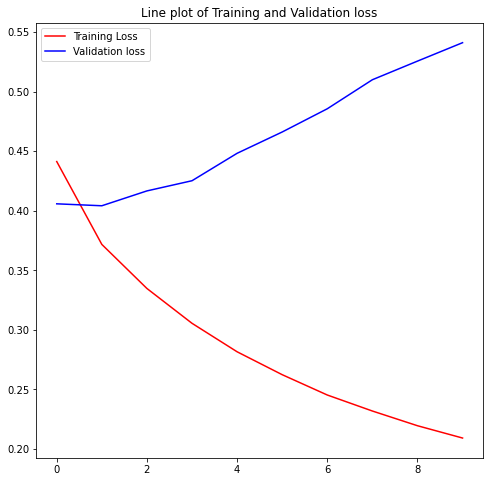

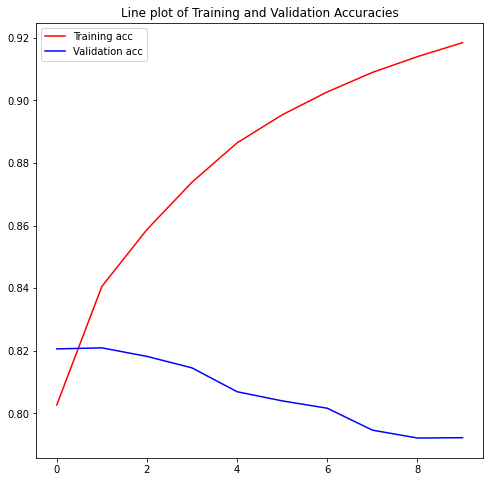

In [ ]:
r1.visualization()

## Gloabal Average Pooling without Dropout

In [ ]:
r2 = RNN_Network(x_train,x_test,y_train,y_test)

In [ ]:
r2.Model_compiling_and_fitting(epochs=10, Global_Average_Pooling=True)

Epoch 1/10
5648/5648 [==============================] - 52s 9ms/step - loss: 0.4354 - acc: 0.8043 - val_loss: 0.4117 - val_acc: 0.8183
Epoch 2/10
5648/5648 [==============================] - 47s 8ms/step - loss: 0.3824 - acc: 0.8311 - val_loss: 0.4084 - val_acc: 0.8203
Epoch 3/10
5648/5648 [==============================] - 46s 8ms/step - loss: 0.3553 - acc: 0.8451 - val_loss: 0.4128 - val_acc: 0.8173
Epoch 4/10
5648/5648 [==============================] - 47s 8ms/step - loss: 0.3306 - acc: 0.8583 - val_loss: 0.4236 - val_acc: 0.8146
Epoch 5/10
5648/5648 [==============================] - 46s 8ms/step - loss: 0.3097 - acc: 0.8696 - val_loss: 0.4288 - val_acc: 0.8113
Epoch 6/10
5648/5648 [==============================] - 45s 8ms/step - loss: 0.2912 - acc: 0.8780 - val_loss: 0.4458 - val_acc: 0.8056
Epoch 7/10
5648/5648 [==============================] - 45s 8ms/step - loss: 0.2735 - acc: 0.8871 - val_loss: 0.4671 - val_acc: 0.8018
Epoch 8/10
5648/5648 [==============================] -

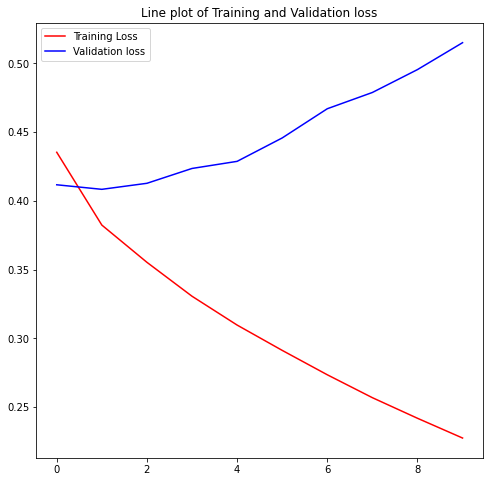

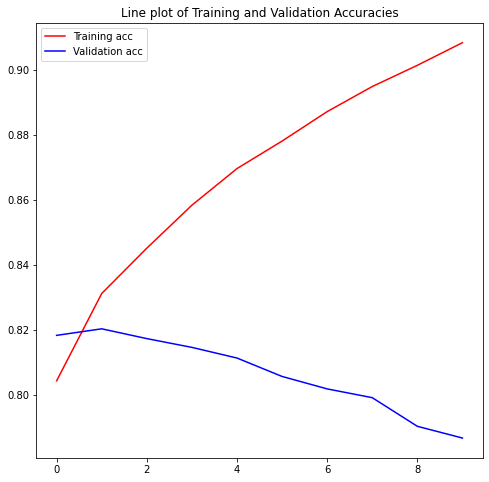

In [ ]:
r2.visualization()

## MultiLayer GRU

In [ ]:
r3 = RNN_Network(x_train,x_test,y_train,y_test)

In [ ]:
r3.Model_compiling_and_fitting(epochs=10, Multi_Layer_GRU=True, Dropout=True)

Epoch 1/10
5648/5648 [==============================] - 59s 9ms/step - loss: 0.4241 - acc: 0.8142 - val_loss: 0.3959 - val_acc: 0.8260
Epoch 2/10
5648/5648 [==============================] - 49s 9ms/step - loss: 0.3542 - acc: 0.8492 - val_loss: 0.3971 - val_acc: 0.8250
Epoch 3/10
5648/5648 [==============================] - 48s 9ms/step - loss: 0.3101 - acc: 0.8717 - val_loss: 0.4192 - val_acc: 0.8192
Epoch 4/10
5648/5648 [==============================] - 48s 8ms/step - loss: 0.2697 - acc: 0.8909 - val_loss: 0.4600 - val_acc: 0.8118
Epoch 5/10
5648/5648 [==============================] - 49s 9ms/step - loss: 0.2317 - acc: 0.9076 - val_loss: 0.4945 - val_acc: 0.8019
Epoch 6/10
5648/5648 [==============================] - 48s 9ms/step - loss: 0.1981 - acc: 0.9222 - val_loss: 0.5683 - val_acc: 0.7970
Epoch 7/10
5648/5648 [==============================] - 52s 9ms/step - loss: 0.1709 - acc: 0.9323 - val_loss: 0.6408 - val_acc: 0.7916
Epoch 8/10
5648/5648 [==============================] -

## GlobalMax without Dense

In [ ]:
r4 = RNN_Network(x_train,x_test,y_train,y_test)

In [ ]:
r4.Model_compiling_and_fitting(epochs=10, Global_Average_Pooling=True)

Epoch 1/10
5648/5648 [==============================] - 67s 12ms/step - loss: 0.4613 - acc: 0.7915 - val_loss: 0.4154 - val_acc: 0.8149
Epoch 2/10
5648/5648 [==============================] - 46s 8ms/step - loss: 0.3866 - acc: 0.8292 - val_loss: 0.4035 - val_acc: 0.8228
Epoch 3/10
5648/5648 [==============================] - 49s 9ms/step - loss: 0.3528 - acc: 0.8483 - val_loss: 0.4061 - val_acc: 0.8247
Epoch 4/10
5648/5648 [==============================] - 48s 9ms/step - loss: 0.3263 - acc: 0.8619 - val_loss: 0.4116 - val_acc: 0.8201
Epoch 5/10
5648/5648 [==============================] - 46s 8ms/step - loss: 0.3042 - acc: 0.8727 - val_loss: 0.4207 - val_acc: 0.8175
Epoch 6/10
5648/5648 [==============================] - 49s 9ms/step - loss: 0.2862 - acc: 0.8820 - val_loss: 0.4320 - val_acc: 0.8143
Epoch 7/10
5648/5648 [==============================] - 46s 8ms/step - loss: 0.2707 - acc: 0.8897 - val_loss: 0.4456 - val_acc: 0.8109
Epoch 8/10
5648/5648 [==============================] 

## Global Average pooling with droput
##### so far this model can tested more

In [ ]:
r5 = RNN_Network(x_train,x_test,y_train,y_test)

In [ ]:
r5.Model_compiling_and_fitting(epochs=10, Global_Average_Pooling=True, Dropout = True)

Epoch 1/10
5648/5648 [==============================] - 39s 7ms/step - loss: 0.5277 - acc: 0.7544 - val_loss: 0.4589 - val_acc: 0.7905
Epoch 2/10
5648/5648 [==============================] - 39s 7ms/step - loss: 0.4792 - acc: 0.7792 - val_loss: 0.4376 - val_acc: 0.8042
Epoch 3/10
5648/5648 [==============================] - 38s 7ms/step - loss: 0.4593 - acc: 0.7908 - val_loss: 0.4290 - val_acc: 0.8094
Epoch 4/10
5648/5648 [==============================] - 39s 7ms/step - loss: 0.4456 - acc: 0.7991 - val_loss: 0.4250 - val_acc: 0.8113
Epoch 5/10
5648/5648 [==============================] - 41s 7ms/step - loss: 0.4347 - acc: 0.8077 - val_loss: 0.4234 - val_acc: 0.8106
Epoch 6/10
5648/5648 [==============================] - 39s 7ms/step - loss: 0.4252 - acc: 0.8141 - val_loss: 0.4228 - val_acc: 0.8121
Epoch 7/10
5648/5648 [==============================] - 41s 7ms/step - loss: 0.4178 - acc: 0.8193 - val_loss: 0.4235 - val_acc: 0.8132
Epoch 8/10
5648/5648 [==============================] -

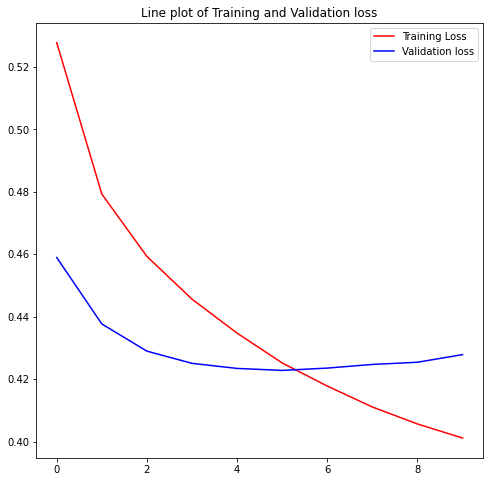

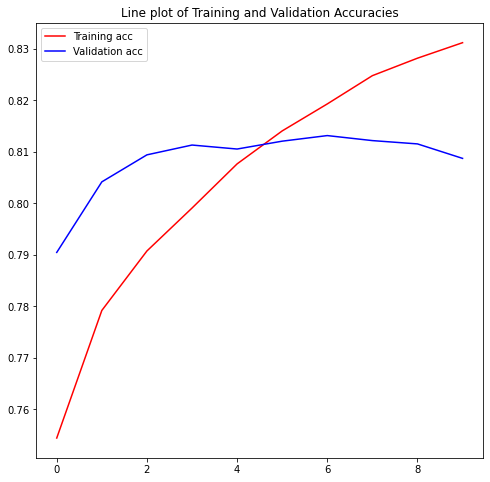

In [ ]:
r5.visualization()

## Single GRU with Droput and without Droput

In [ ]:
r6 = RNN_Network(x_train,x_test,y_train,y_test)

In [ ]:
r6.Model_compiling_and_fitting(epochs=10, Single_GRU=True, Dropout=True)

2022.02.02 
### Single layers LSTM with and without droput

In [ ]:
r7 = RNN_Network(x_train,x_test,y_train,y_test)

In [ ]:
r7.Model_compiling_and_fitting(epochs=10, Single_Layer_LSTM=True, Dropout=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 50, 16)            800000    
                                                                 
 lstm_3 (LSTM)               (None, 16)                2112      
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 802,129
Trainable params: 802,129
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
5648/5648 [==============================] - 83s 14ms/step - loss: 0.4337 - acc: 0.8119 - val_loss: 0.3923 - val_acc: 0.8276
Epoch 2/10
5648/5648 [=================

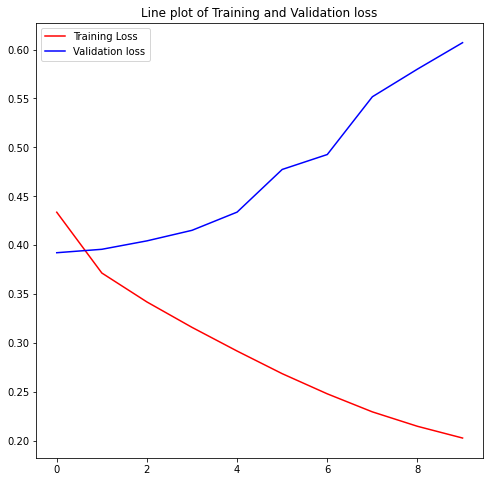

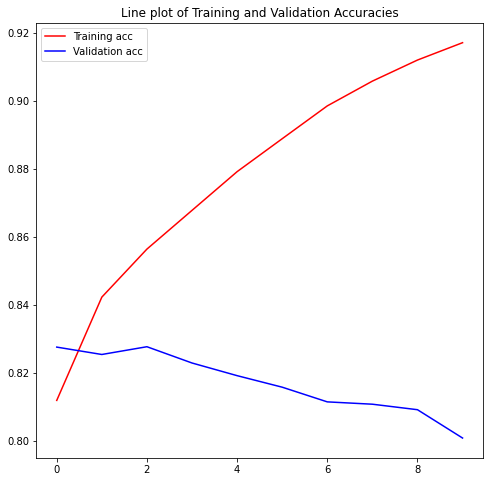

In [ ]:
r7.visualization()

### Global Pooling

In [ ]:
r7 = RNN_Network(x_train,x_test,y_train,y_test)

In [ ]:
r7.Model_compiling_and_fitting(epochs=10, Global_Average_Pooling=True, Dropout=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            800000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 800,017
Trainable params: 800,017
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
5648/5648 [==============================] - 29s 5ms/step - loss: 0.5220 - acc: 0.7531 - val_loss: 0

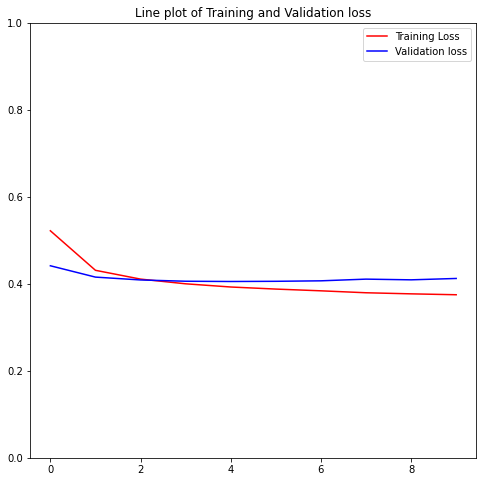

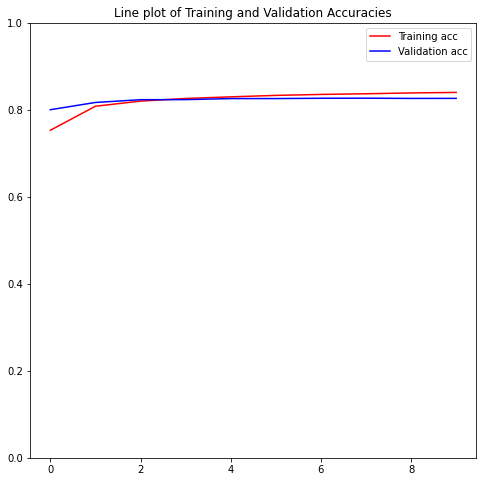

In [ ]:
r7.visualization()

In [ ]:
r8 = RNN_Network(x_train,x_test,y_train,y_test)

In [ ]:
r8.Model_compiling_and_fitting(epochs = 10, Global_Average_Pooling=True, Dropout=True, save_model=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 16)            800000    
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 800,017
Trainable params: 800,017
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
5648/5648 [==============================] - 21s 4ms/step - loss: 0.5218 - acc: 0.7532 - val_loss:

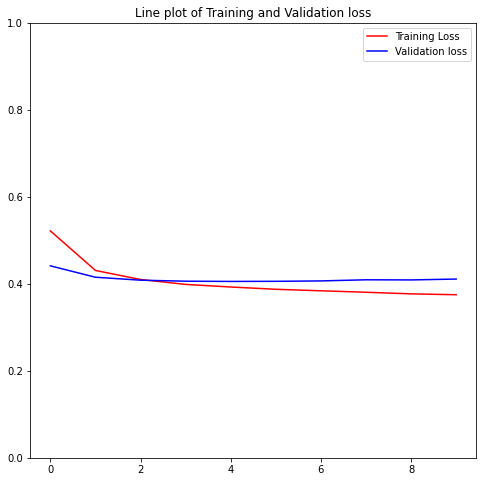

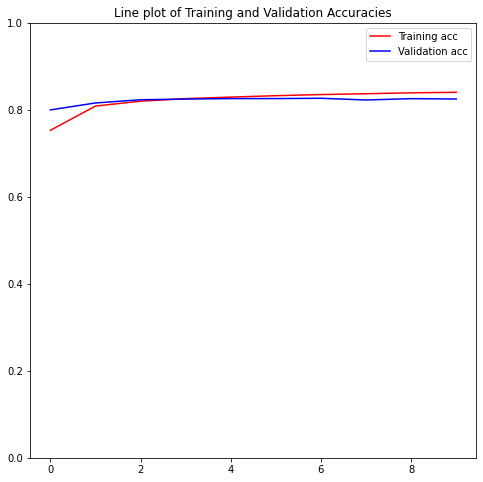

In [ ]:
r8.visualization()